In [73]:
from IPython import get_ipython
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


In [74]:
train = pd.read_csv('/content/train.csv')

<ipython-input-74-e7bab7bf7086>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/train.csv')


In [75]:
test = pd.read_csv('/content/test.csv')

<ipython-input-75-b1d67c496223>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('/content/test.csv')


In [76]:
print(train['!'].unique())

['!' '$' '&' '(' ')' '+' '0' 0 1 2 3 4 5 6 7 8 9 '9' '<' '>' '?' 'A' 'B'
 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T'
 'U' 'V' 'W' 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l'
 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' '~' 'ß' 'α' 'β'
 'π' 'φ' '€' '∑' '√' '∞' '∫']


In [77]:
classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
           'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
           'u', 'v','w', 'x', 'y', 'z']

In [78]:
train_data = train[train['!'].isin(classes)].reset_index(drop=True)

In [79]:
if train_data.empty:
    print("train_data is empty. Check the values in the '!' column and the 'classes' list.")
else:
    train_data.sample(5)

In [80]:
test['!'].unique()

array(['!', '$', '&', '(', ')', '+', '0', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
       '9', '<', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
       'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
       'w', 'x', 'y', 'z', '~', 'ß', 'α', 'β', 'π', 'φ', '€', '∑', '√',
       '∞', '∫'], dtype=object)

In [81]:
len(classes)

26

In [82]:
train_data = train[train['!'].isin(classes)].reset_index(drop=True)

In [83]:
test_data = test[test['!'].isin(classes)].reset_index(drop=True)

In [84]:
if test_data.empty:
    print("test_data is empty. No samples can be drawn.")
else:
    # If not empty, proceed with sampling
    display(test_data.sample(5))

,!,0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.1482,0.1483,0.1484,0.1485,0.1486,0.1487,0.1488,0.1489,0.1490,0.1491
9423,s,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5131,k,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12583,z,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2745,f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5382,k,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
data_test = test_data.sample(frac=1, random_state=42)
validation_split = 0.2
validation_size = int(len(data_test) * validation_split)

validation_data = data_test[:validation_size]
data_test = data_test[validation_size:]

In [86]:
print(validation_data.shape)
print(test_data.shape)

(2600, 1601)
(13000, 1601)


In [87]:
print(train_data.shape)

(73309, 1601)


In [88]:
def format_fitur(data):
    fitur = data.drop(columns='!')
    data_fitur = fitur.astype(int)/255.0 # change the scale the value between 0 to 1
    train_fitur = np.array(data_fitur)
    X = train_fitur.reshape(-1, 40, 40, 1) # reformat the shape so it will fit the model

    return X

def format_label(data):
    label = data['!']
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(label) # turn the label into numeric value

    return y

In [89]:
X_train = format_fitur(train_data)
y_train = format_label(train_data)

In [90]:
X_valid = format_fitur(validation_data)
y_valid = format_label(validation_data)

In [91]:
X_test = format_fitur(test_data)
y_test = format_label(test_data)

In [92]:
X_test.shape

(13000, 40, 40, 1)

In [93]:
model = Sequential()

In [94]:
model.add(layers.Input(shape=(40, 40, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(layers.Dense(26, activation='softmax')) # the output is 26 same as the number of the alphabet

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy', # used because the number of the output more than 2
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 38, 38, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 19, 19, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 17, 17, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           6,682 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,522 (1.50 MB)

 Trainable params: 394,522 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [98]:
batch_size = 32
validation_steps = max(1, len(X_valid) // batch_size)
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    verbose=1,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)

Epoch 1/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 178s 78ms/step - accuracy: 0.9203 - loss: 0.3121 - val_accuracy: 0.9090 - val_loss: 0.3964
Epoch 2/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 196s 75ms/step - accuracy: 0.9246 - loss: 0.2971 - val_accuracy: 0.9059 - val_loss: 0.4102
Epoch 3/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 203s 75ms/step - accuracy: 0.9267 - loss: 0.2890 - val_accuracy: 0.9101 - val_loss: 0.4007
Epoch 4/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 203s 76ms/step - accuracy: 0.9275 - loss: 0.2779 - val_accuracy: 0.9109 - val_loss: 0.4104


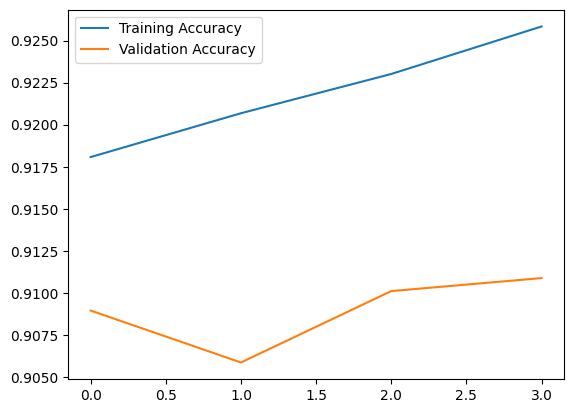

In [99]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [100]:
predict = model.predict(X_test)

407/407 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step


In [101]:
test_loss, test_acc = model.evaluate(X_test, y_test)

407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8858 - loss: 0.4823


In [102]:
print('Test loss:', round(test_loss,2))
print(f'Test accuracy: {round(test_acc,2)*100}%')

Test loss: 0.43
Test accuracy: 90.0%


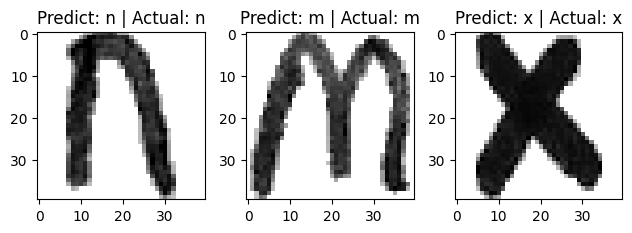

In [103]:
plot_number = 1

for i in np.random.randint(0, len(X_test)+1, 3):
    plt.subplot(1, 3, plot_number)
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary) # change the test data into image
    plt.title(f"Predict: {classes[np.argmax(predict[i])]} | Actual: {classes[y_test[i]]}")

    plt.tight_layout(pad=1.0)
    plot_number += 1

plt.show()